## Import data
- Ward: An item that players can place on the map to reveal the nearby area. Very useful for map/objectives control.
- Assist: Awards partial gold and experience points when damage is done to contribute to an enemy's death.
- Elite Monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
- Dragon: AKA Drake. This powerful neutral monster grants various permanent effects and buffs when when killed by a team.
- Herald: A monster that spawns on the eigth minute. Grants a buff that allows the user to spawn the Herald for your team to help push towers and lanes.
- Tower: A structure that blocks the enemy’s path to the base. They take high damage and fire at opponents within a certain radius.
- Gold: Currency awarded for killing monsters or enemy players as well as for completing objectives.
- Level: Champion level. Start at 1. Max is 18.
- Minions: Non-player characters (NPCs) that spawn from each team’s base.
- Jungle Minions: NPC that belong to NO TEAM. They give gold and temporary buffs when killed by players.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [19]:
df.shape

(9879, 39)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [13]:
df = df.drop("gameId", axis=1)
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## Data cleaning

In [21]:
df_b = df.copy()
df_b.corr()["blueWins"].abs().sort_values(ascending=False)

blueWins                        1.000000
redGoldDiff                     0.511119
blueGoldDiff                    0.511119
redExperienceDiff               0.489558
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
redTotalGold                    0.411396
redGoldPerMin                   0.411396
blueTotalExperience             0.396141
redTotalExperience              0.387588
blueAvgLevel                    0.357820
redAvgLevel                     0.352127
blueDeaths                      0.339297
redKills                        0.339297
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
redAssists                      0.271047
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
redEliteMonsters                0.221551
blueDragons                     0.213768
redTotalMinionsK

In [22]:
to_drop = [
    "redGoldDiff",
    "blueGoldDiff",
    "redExperienceDiff",
    "blueExperienceDiff",
    "redFirstBlood",
    "redGoldPerMin",
    "blueGoldPerMin",
    "blueCSPerMin",
    "redCSPerMin",
    "redDeaths",
    "redKills",
    "redAssists",
    "blueAssists"
]
df_b = df.drop(to_drop, axis = 1)
df_b.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

因為遊戲的本質是比對方表現更好，因此比較差異diff的特徵應該更有意義。


In [24]:
diffFeatures = [
    "TotalGold",
    "TotalExperience",
    "AvgLevel",
    "TotalMinionsKilled",
    "EliteMonsters",
    "Dragons",
    "TotalJungleMinionsKilled",
    "TowersDestroyed",
    "Heralds",
    "WardsDestroyed",
    "WardsPlaced"
]

for i in diffFeatures :
    df_b[i+"Diff"] = df["blue"+i] - df["red"+i]

In [26]:
temp = []
c = df_b.corr()["blueWins"]
for i in diffFeatures :
    temp.append((i, c["blue"+i], c["red"+i], c[i+"Diff"], c[i+"Diff"] > max(abs(c["blue"+i]), abs(c["red"+i]))))

temp = pd.DataFrame(temp, columns = ["feature", "blue corr", "red corr", "diff corr", "better?"])
temp

,feature,blue corr,red corr,diff corr,better?
0,TotalGold,0.417213,-0.411396,0.511119,True
1,TotalExperience,0.396141,-0.387588,0.489558,True
2,AvgLevel,0.357820,-0.352127,0.452927,True
3,TotalMinionsKilled,0.224909,-0.212171,0.309126,True
4,EliteMonsters,0.221944,-0.221551,0.259969,True
5,Dragons,0.213768,-0.209516,0.234264,True
6,TotalJungleMinionsKilled,0.131445,-0.110994,0.169118,True
7,TowersDestroyed,0.115566,-0.103696,0.156179,True
8,Heralds,0.092385,-0.097172,0.121713,True
9,WardsDestroyed,0.044247,-0.055400,0.075205,True


結果顯示差異 diff 比單一數據效果更好。

因此我們將減少 11 列（刪除 22 列，新增 11 列）。

In [27]:
to_drop = []
for i in diffFeatures :
    to_drop.append("blue"+i)
    to_drop.append("red"+i)

df_b = df_b.drop(to_drop, axis=1)

In [28]:
df_b.corr()["blueWins"].abs().sort_values(ascending=False)

blueWins                        1.000000
TotalGoldDiff                   0.511119
TotalExperienceDiff             0.489558
AvgLevelDiff                    0.452927
blueDeaths                      0.339297
blueKills                       0.337358
TotalMinionsKilledDiff          0.309126
EliteMonstersDiff               0.259969
DragonsDiff                     0.234264
blueFirstBlood                  0.201769
TotalJungleMinionsKilledDiff    0.169118
TowersDestroyedDiff             0.156179
HeraldsDiff                     0.121713
WardsDestroyedDiff              0.075205
WardsPlacedDiff                 0.016890
Name: blueWins, dtype: float64

<Axes: >

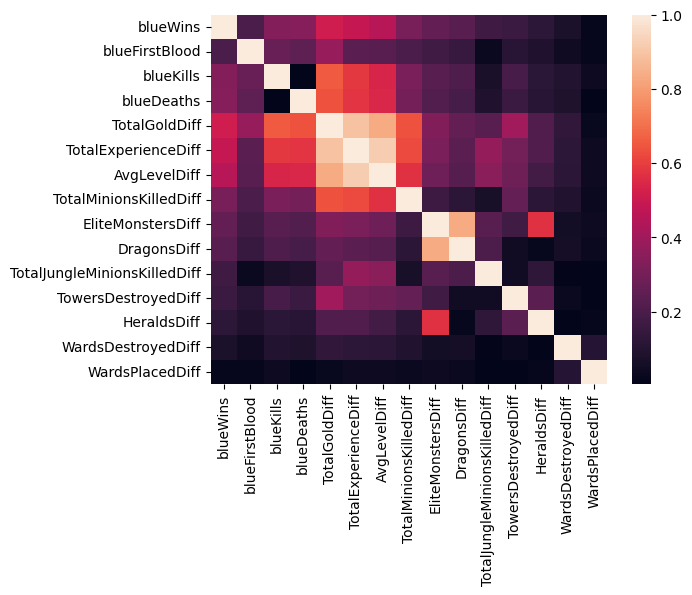

In [30]:
sns.heatmap(df_b.corr().abs())

高度相關特徵 :
- 3x3 highlight (TotalGoldDiff, TotalExperienceDiff, AvgLevelDiff)
- 2x2 highlight (EliteMonstersDiff, DragonsDiff)
> 我們可以嘗試使用方差膨脹因子（VIF）來消除它們。

In [33]:
def get_vif_info(df) :
    df_b = df.copy()
    vif_info = pd.DataFrame()
    vif_info['VIF'] = [variance_inflation_factor(df_b.values, i) for i in range(df_b.shape[1])]
    vif_info['Column'] = df_b.columns
    return vif_info.sort_values('VIF', ascending=False)

get_vif_info(df_b)

,VIF,Column
8,inf,EliteMonstersDiff
9,inf,DragonsDiff
12,inf,HeraldsDiff
2,36.057716,blueKills
3,35.350816,blueDeaths
4,20.701543,TotalGoldDiff
5,12.273297,TotalExperienceDiff
6,6.499939,AvgLevelDiff
7,2.951523,TotalMinionsKilledDiff
0,2.454974,blueWins


我們可以看到Dragon、Herald 和 Elite Monsters 之間存在著巨大（無限）的相關性。

經過進一步檢查，我們發現「 Elite Monsters = Dragon and Herald 」。所以我們放棄 Elite Monsters 欄位。

In [35]:
get_vif_info(df_b.drop(["EliteMonstersDiff"], axis=1))

,VIF,Column
2,36.057716,blueKills
3,35.350816,blueDeaths
4,20.701543,TotalGoldDiff
5,12.273297,TotalExperienceDiff
6,6.499939,AvgLevelDiff
7,2.951523,TotalMinionsKilledDiff
0,2.454974,blueWins
1,2.300345,blueFirstBlood
9,1.773969,TotalJungleMinionsKilledDiff
10,1.533042,TowersDestroyedDiff


異常現象已刪除，我們可以繼續建模型。

## Prediction

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

In [40]:
scaler = StandardScaler()
X, y = df_b.drop(["blueWins"], axis=1), df_b["blueWins"]
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [41]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
print(f"Training accurcay : {LRmodel.score(X_train, y_train)}")
print(f"Testing accurcay : {LRmodel.score(X_test, y_test)}")

Training accurcay : 0.7350129344280734
Testing accurcay : 0.7186234817813765


- 檢查各特徵的重要性

Feature: blueFirstBlood, Score: 0.036
Feature: blueKills, Score: -0.121
Feature: blueDeaths, Score: 0.104
Feature: TotalGoldDiff, Score: 1.210
Feature: TotalExperienceDiff, Score: 0.495
Feature: AvgLevelDiff, Score: -0.016
Feature: TotalMinionsKilledDiff, Score: -0.132
Feature: EliteMonstersDiff, Score: 0.129
Feature: DragonsDiff, Score: 0.178
Feature: TotalJungleMinionsKilledDiff, Score: -0.013
Feature: TowersDestroyedDiff, Score: -0.093
Feature: HeraldsDiff, Score: -0.032
Feature: WardsDestroyedDiff, Score: 0.000
Feature: WardsPlacedDiff, Score: -0.002


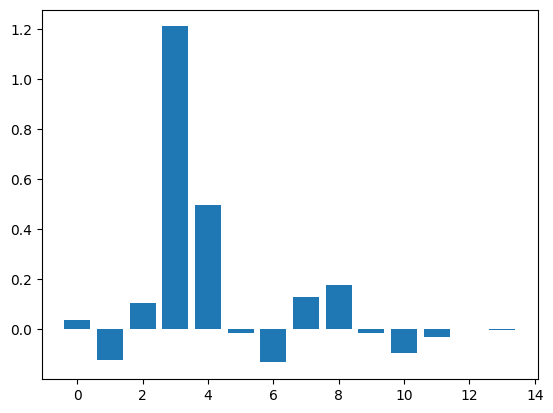

In [42]:
fi_data = []
importance = LRmodel.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.3f' % (df_b.columns[i+1],v))
    fi_data.append((df_b.columns[i+1],v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [44]:
fi_data = sorted(fi_data, key=lambda x : -x[1])  #降序
fi_data

[('TotalGoldDiff', 1.210227999986297),
 ('TotalExperienceDiff', 0.49530798265793136),
 ('DragonsDiff', 0.1782894466780119),
 ('EliteMonstersDiff', 0.1291163722778489),
 ('blueDeaths', 0.1043880625812099),
 ('blueFirstBlood', 0.03585941147534377),
 ('WardsDestroyedDiff', 6.177146446475029e-05),
 ('WardsPlacedDiff', -0.0019431649199484224),
 ('TotalJungleMinionsKilledDiff', -0.012668714523011479),
 ('AvgLevelDiff', -0.015959274687399928),
 ('HeraldsDiff', -0.03193452613151864),
 ('TowersDestroyedDiff', -0.09317240509298155),
 ('blueKills', -0.1207811341633076),
 ('TotalMinionsKilledDiff', -0.13196930300506368)]

實驗結果，這是在比賽的前10分鐘內，為了獲得約70%勝率的重要性排序。